In [ ]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

#from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Read the csv file
df = pd.read_csv('/content/drive/MyDrive/GE.csv')
print(df.head()) #7 columns, including the Date.
print(len(df))

         Date       Open       High        Low      Close  Adj Close   Volume
0  2023-05-01  79.401436  81.404633  79.305664  80.750198  80.396339  7408237
1  2023-05-02  80.295288  81.428574  79.960098  81.013565  80.658554  7485046
2  2023-05-03  81.308861  82.162811  80.853951  81.221069  80.865158  5917543
3  2023-05-04  80.997604  81.205109  77.741425  79.265762  78.918419  9055431
4  2023-05-05  80.271347  81.213089  79.608940  80.000000  79.649429  6302841
252


In [ ]:
#Separate dates for future plotting
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
print(df['Date'].tail(15)) #Check last few dates.

237   2024-04-10
238   2024-04-11
239   2024-04-12
240   2024-04-15
241   2024-04-16
242   2024-04-17
243   2024-04-18
244   2024-04-19
245   2024-04-22
246   2024-04-23
247   2024-04-24
248   2024-04-25
249   2024-04-26
250   2024-04-29
251   2024-04-30
Name: Date, dtype: datetime64[ns]


<ipython-input-4-fb910e6c8daa>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)


In [ ]:
df_input=df[['Open', 'High', 'Low', 'Close', 'Adj Close']]

In [ ]:
df_input.describe()


,Open,High,Low,Close,Adj Close
count,252.000000,252.000000,252.000000,252.000000,252.000000
mean,101.522247,102.731026,100.545529,101.732871,101.475118
std,21.811776,22.392696,21.355667,21.986586,22.043834
min,79.122108,79.792496,77.741425,78.850761,78.505234
25%,87.354351,88.501596,86.270947,87.661614,87.369942
50%,91.516362,92.458099,90.885875,91.719876,91.402580
75%,105.241418,107.204710,104.904232,105.983640,105.795439
max,163.559998,166.259995,163.000000,164.490005,164.490005


['Open', 'High', 'Low', 'Close', 'Adj Close']


<Axes: >

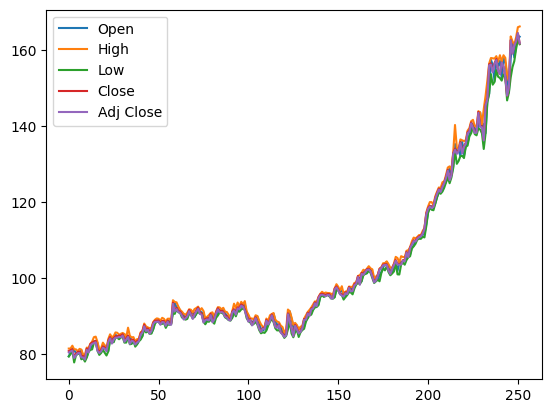

In [ ]:
cols = list(df)[1:6]
#Date and volume columns are not used in training.
print(cols) #['Open', 'High', 'Low', 'Close', 'Adj Close']

#New dataframe with only training data - 5 columns
df_for_training = df[cols].astype(float)
df_for_plot=df_for_training.tail(5000)
df_for_plot.plot.line()

In [ ]:
#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = MinMaxScaler()
data_Scaled = scaler.fit_transform(df_input)
data_Scaled


array([[0.00330809, 0.01864443, 0.018347  , 0.02217952, 0.02199349],
       [0.013894  , 0.01892131, 0.02602287, 0.02525482, 0.02504304],
       [0.02589777, 0.02741279, 0.0365069 , 0.02767782, 0.02744584],
       ...,
       [0.96980025, 0.96657704, 0.9684489 , 0.97501147, 0.97511188],
       [0.99336793, 0.99780278, 1.        , 1.        , 1.        ],
       [1.        , 1.        , 0.98334481, 0.96882273, 0.96894801]])

In [ ]:
features= data_Scaled
target=data_Scaled[:,0]


In [ ]:
TimeseriesGenerator(features,target,length=14, sampling_rate=1,batch_size=1)[0]

(array([[[0.00330809, 0.01864443, 0.018347  , 0.02217952, 0.02199349],
         [0.013894  , 0.01892131, 0.02602287, 0.02525482, 0.02504304],
         [0.02589777, 0.02741279, 0.0365069 , 0.02767782, 0.02744584],
         [0.02221155, 0.01633692, 0.        , 0.00484592, 0.00480533],
         [0.01361047, 0.01642921, 0.02190413, 0.01341954, 0.01330695],
         [0.01020787, 0.01042981, 0.02630368, 0.01975661, 0.01959105],
         [0.01540627, 0.0177214 , 0.03145204, 0.02050208, 0.02033017],
         [0.02211704, 0.01559849, 0.00982871, 0.0068961 , 0.0068383 ],
         [0.00245749, 0.        , 0.01319864, 0.00661655, 0.00656102],
         [0.00415878, 0.00018458, 0.00280814, 0.        , 0.        ],
         [0.        , 0.02150569, 0.01507077, 0.02982128, 0.02957127],
         [0.01975416, 0.02076725, 0.03257535, 0.0217136 , 0.02153157],
         [0.02580325, 0.03322761, 0.03875351, 0.04352036, 0.04315541],
         [0.03544397, 0.03968846, 0.04043843, 0.04855274, 0.04814575]]]),
 ar

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(features, target, test_size=0.20,random_state=47, shuffle=False)

In [ ]:
x_train.shape

(201, 5)

In [ ]:
x_test.shape

(51, 5)

In [ ]:
win_length=14
batch_size=32
num_features=5
train_generator=TimeseriesGenerator(features,target,length=win_length, sampling_rate=1,batch_size=batch_size)
test_generator=TimeseriesGenerator(features,target,length=win_length, sampling_rate=1,batch_size=batch_size)

In [ ]:
train_generator[0]

(array([[[0.00330809, 0.01864443, 0.018347  , 0.02217952, 0.02199349],
         [0.013894  , 0.01892131, 0.02602287, 0.02525482, 0.02504304],
         [0.02589777, 0.02741279, 0.0365069 , 0.02767782, 0.02744584],
         ...,
         [0.01975416, 0.02076725, 0.03257535, 0.0217136 , 0.02153157],
         [0.02580325, 0.03322761, 0.03875351, 0.04352036, 0.04315541],
         [0.03544397, 0.03968846, 0.04043843, 0.04855274, 0.04814575]],
 
        [[0.013894  , 0.01892131, 0.02602287, 0.02525482, 0.02504304],
         [0.02589777, 0.02741279, 0.0365069 , 0.02767782, 0.02744584],
         [0.02221155, 0.01633692, 0.        , 0.00484592, 0.00480533],
         ...,
         [0.02580325, 0.03322761, 0.03875351, 0.04352036, 0.04315541],
         [0.03544397, 0.03968846, 0.04043843, 0.04855274, 0.04814575],
         [0.05085032, 0.05353331, 0.06018964, 0.05088248, 0.05045591]],
 
        [[0.02589777, 0.02741279, 0.0365069 , 0.02767782, 0.02744584],
         [0.02221155, 0.01633692, 0.       

In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape=(win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))

model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))

model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 14, 128)           68608     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 14, 128)           0         
                                                                 
 lstm_10 (LSTM)              (None, 14, 128)           131584    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 14, 128)           0         
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),optimizer=tf.optimizers.Adam(),metrics=[tf.metrics.MeanAbsoluteError()])

history=model.fit_generator(train_generator, epochs=50, validation_data=test_generator, shuffle=False, callbacks=[early_stopping])

<ipython-input-88-2cd0d306e508>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator, epochs=50, validation_data=test_generator, shuffle=False, callbacks=[early_stopping])


Epoch 1/50
8/8 [==============================] - 8s 283ms/step - loss: 0.0402 - mean_absolute_error: 0.1474 - val_loss: 0.0084 - val_mean_absolute_error: 0.0638
Epoch 2/50
8/8 [==============================] - 1s 86ms/step - loss: 0.0325 - mean_absolute_error: 0.1509 - val_loss: 0.0024 - val_mean_absolute_error: 0.0353
Epoch 3/50
8/8 [==============================] - 1s 85ms/step - loss: 0.0702 - mean_absolute_error: 0.1737 - val_loss: 0.0525 - val_mean_absolute_error: 0.1526
Epoch 4/50
8/8 [==============================] - 1s 90ms/step - loss: 0.0120 - mean_absolute_error: 0.0700 - val_loss: 0.0067 - val_mean_absolute_error: 0.0738


In [ ]:
model.evaluate_generator(test_generator, verbose=0)

<ipython-input-89-a68ec1088d46>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator, verbose=0)


[0.0067184194922447205, 0.07383093237876892]

In [ ]:
predictions=model.predict_generator(test_generator)

<ipython-input-90-6ca49477046f>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions=model.predict_generator(test_generator)


In [ ]:
predictions.shape[0]

238

In [ ]:
predictions

array([[0.06069248],
       [0.06190038],
       [0.0636282 ],
       [0.06547342],
       [0.06878794],
       [0.07135198],
       [0.07352749],
       [0.07526023],
       [0.07736312],
       [0.07959634],
       [0.08246042],
       [0.0842241 ],
       [0.0863206 ],
       [0.08796078],
       [0.08997623],
       [0.09197763],
       [0.09452406],
       [0.09912506],
       [0.10467201],
       [0.10951727],
       [0.1133441 ],
       [0.11685061],
       [0.12052029],
       [0.12191556],
       [0.12110177],
       [0.12062764],
       [0.11952955],
       [0.11768666],
       [0.11649786],
       [0.11629614],
       [0.11703776],
       [0.11855596],
       [0.1216896 ],
       [0.1253084 ],
       [0.12828988],
       [0.13335527],
       [0.13893299],
       [0.14475949],
       [0.15175258],
       [0.15824336],
       [0.16416651],
       [0.16864215],
       [0.17232646],
       [0.17412685],
       [0.176603  ],
       [0.17952327],
       [0.18378814],
       [0.188

In [ ]:
x_test[:,1:][win_length:]

array([[0.69990174, 0.6546912 , 0.64451216, 0.64317231],
       [0.63169296, 0.61378457, 0.63146528, 0.63020093],
       [0.62597044, 0.62267727, 0.63985252, 0.63853974],
       [0.65596761, 0.63746741, 0.66501424, 0.66355581],
       [0.65319864, 0.63859063, 0.63323598, 0.6319615 ],
       [0.65089114, 0.63166375, 0.65317896, 0.65178902],
       [0.65319864, 0.66620492, 0.66268442, 0.66123943],
       [0.68254959, 0.67013637, 0.69576746, 0.69413114],
       [0.69039502, 0.69831227, 0.70014736, 0.69848564],
       [0.71134678, 0.70842179, 0.72540227, 0.72359434],
       [0.71550032, 0.72704978, 0.71151672, 0.70978926],
       [0.69713277, 0.70561355, 0.69604702, 0.69440905],
       [0.69288712, 0.70196292, 0.69660614, 0.69496484],
       [0.7418977 , 0.72330553, 0.75783283, 0.75583726],
       [0.73829811, 0.72002911, 0.71505796, 0.71330987],
       [0.70193236, 0.70814098, 0.7134738 , 0.71173492],
       [0.7484604 , 0.65974103, 0.67281351, 0.67130989],
       [0.78812857, 0.70689159,

In [ ]:
df_pred=pd.concat([pd.DataFrame(predictions),pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [ ]:
df_pred

,0,0,1,2,3
0,0.111924,0.699902,0.654691,0.644512,0.643172
1,0.112877,0.631693,0.613785,0.631465,0.630201
2,0.114236,0.625970,0.622677,0.639853,0.638540
3,0.115630,0.655968,0.637467,0.665014,0.663556
4,0.117951,0.653199,0.638591,0.633236,0.631962
...,...,...,...,...,...
233,0.821734,NaN,NaN,NaN,NaN
234,0.825068,NaN,NaN,NaN,NaN
235,0.826388,NaN,NaN,NaN,NaN
236,0.827296,NaN,NaN,NaN,NaN


In [ ]:
rev_trans=scaler.inverse_transform(df_pred)
rev_trans

array([[ 88.57277467, 140.311249  , 133.559464  , 134.046295  ,
        133.808258  ],
       [ 88.65318327, 134.413406  , 130.071823  , 132.92897   ,
        132.692917  ],
       [ 88.7679143 , 133.918594  , 130.830002  , 133.647247  ,
        133.409927  ],
       ...,
       [148.90055206,          nan,          nan,          nan,
                 nan],
       [148.97725331,          nan,          nan,          nan,
                 nan],
       [149.22014061,          nan,          nan,          nan,
                 nan]])

In [ ]:
df_final=df_input[predictions.shape[0]*-1:]

In [ ]:
df_final.count()

Open         238
High         238
Low          238
Close        238
Adj Close    238
dtype: int64

In [ ]:
df_final['open_pred']=rev_trans[:,0]

<ipython-input-98-7d646e04597d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['open_pred']=rev_trans[:,0]


In [ ]:
df_final

,Open,High,Low,Close,Adj Close,open_pred
14,83.415802,84.421387,82.873108,83.208298,82.843674,88.572775
15,83.080605,84.549080,83.080605,83.439743,83.074104,88.653183
16,82.889069,83.112534,80.830009,81.165207,80.809540,88.767914
17,80.830009,80.981644,79.736633,80.590584,80.237427,88.885692
18,80.925781,81.476456,80.239426,81.021545,80.666496,89.081636
...,...,...,...,...,...,...
247,161.869995,162.339996,155.559998,159.190002,159.190002,148.507584
248,158.089996,161.479996,157.119995,161.259995,161.259995,148.789134
249,161.009995,163.369995,160.309998,162.350006,162.350006,148.900552
250,163.000000,166.070007,163.000000,164.490005,164.490005,148.977253


<Axes: >

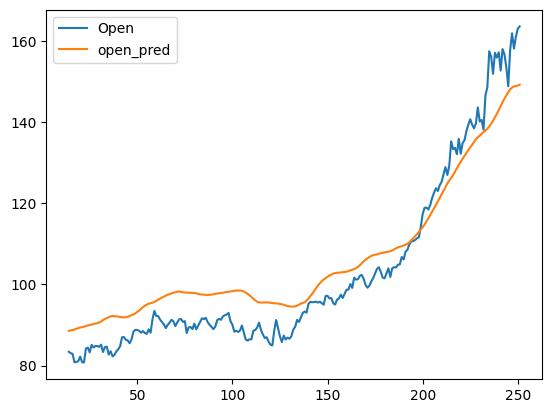

In [ ]:
df_final[['Open','open_pred']].plot()

In [ ]:
# Assuming you've already trained your model and have your test_generator ready
mse, mae = model.evaluate(test_generator, verbose=0)
print("Test MSE:", mse)
print("Test MAE:", mae)


Test MSE: 0.0008756145252846181
Test MAE: 0.02258354425430298


In [ ]:
from sklearn.metrics import r2_score

# You need the actual and predicted values as arrays to compute R² score
# Let's assume you have these values in actuals and predictions variables
# You can obtain these by comparing indices in your test set or using your earlier defined DataFrame
actuals = df_final['Open'].values
predictions = df_final['open_pred'].values

# Compute R² score
r2 = r2_score(actuals, predictions)
print("Test R² score:", r2)


Test R² score: 0.8989323711631869


In [ ]:
import numpy as np
model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])

# After training, evaluate the model on the test set
test_loss, test_mae = model.evaluate(test_generator, verbose=0)
print("Test MSE:", test_loss)
print("Test MAE:", test_mae)

# Optionally, calculate RMSE
test_rmse = np.sqrt(test_loss)
print("Test RMSE:", test_rmse)


Test MSE: 0.0008756145252846181
Test MAE: 0.02258354425430298
Test RMSE: 0.029590784465515916
